In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Downloads/Training.csv')

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
X = df.iloc[:, :-1]
y = df['prognosis']

In [5]:
# Train, Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [7]:
rf_clf.fit(X_train, y_train)

print("Accuracy on split test: ", rf_clf.score(X_test,y_test))

('Accuracy on split test: ', 1.0)


C:\Users\SHARAZ HAIDER\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
# Load real test data
df_test = pd.read_csv('Downloads/Testing.csv')

In [9]:
X_acutal_test = df_test.iloc[:, :-1]
y_actual_test = df_test['prognosis']

In [10]:
print("Accuracy on acutal test: ", rf_clf.score(X_acutal_test, y_actual_test))

('Accuracy on acutal test: ', 1.0)


In [12]:
symptoms_dict = {}

for index, symptom in enumerate(X):
    symptoms_dict[symptom] = index

In [13]:
symptoms_dict

{'abdominal_pain': 39,
 'abnormal_menstruation': 101,
 'acidity': 8,
 'acute_liver_failure': 44,
 'altered_sensorium': 98,
 'anxiety': 16,
 'back_pain': 37,
 'belly_pain': 100,
 'blackheads': 123,
 'bladder_discomfort': 89,
 'blister': 129,
 'blood_in_sputum': 118,
 'bloody_stool': 61,
 'blurred_and_distorted_vision': 49,
 'breathlessness': 27,
 'brittle_nails': 72,
 'bruising': 66,
 'burning_micturition': 12,
 'chest_pain': 56,
 'chills': 5,
 'cold_hands_and_feets': 17,
 'coma': 113,
 'congestion': 55,
 'constipation': 38,
 'continuous_feel_of_urine': 91,
 'continuous_sneezing': 3,
 'cough': 24,
 'cramps': 65,
 'dark_urine': 33,
 'dehydration': 29,
 'depression': 95,
 'diarrhoea': 40,
 'dischromic _patches': 102,
 'distention_of_abdomen': 115,
 'dizziness': 64,
 'drying_and_tingling_lips': 76,
 'enlarged_thyroid': 71,
 'excessive_hunger': 74,
 'extra_marital_contacts': 75,
 'family_history': 106,
 'fast_heart_rate': 58,
 'fatigue': 14,
 'fluid_overload': 45,
 'fluid_overload.1': 117,


In [27]:
# slicing fisrt 10 symptoms 
import itertools
D=dict(itertools.islice(symptoms_dict.items(), 15))

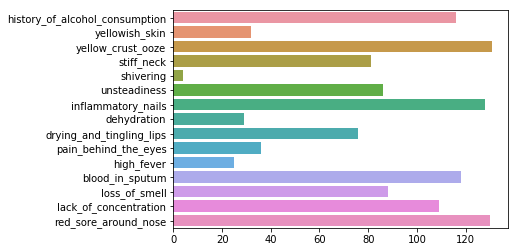

In [28]:
# Accurance of symptoms in test data (first 15)
import seaborn as sns

sns.barplot(list(D.values()), list(D.keys()))

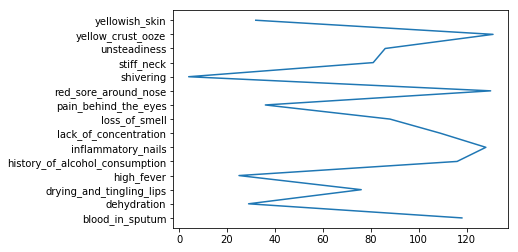

In [29]:
import matplotlib.pylab as plt

lists = sorted(D.items())

x, y = zip(*lists) 

plt.plot(y,x)
plt.show()

In [12]:
input_vector = np.zeros(len(symptoms_dict))

In [21]:
input_vector[[symptoms_dict['itching'], symptoms_dict['skin_rash'],symptoms_dict['nodal_skin_eruptions']]] = 1

In [22]:
rf_clf.predict_proba([input_vector])

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0.1, 0. ]])

In [23]:
rf_clf.predict([input_vector])

array(['Fungal infection'], dtype=object)